In [2]:
# Installing packages:

!apt install gdal-bin python3-gdal
!apt install python3-rtree
!pip install geopandas
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,968 kB of archives.
After this operation, 24.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.4.3+dfsg-1~jammy0 [967 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.4.3+dfsg-1~jammy0 [534 kB]
Fetched 4,968 kB in 4s (1,116 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 120895 files and directories currentl

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
!wget https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
!unzip yelp_academic_dataset_business.zip

--2023-09-21 16:22:35--  https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3x1w789mmuae3ao/yelp_academic_dataset_business.zip [following]
--2023-09-21 16:22:36--  https://www.dropbox.com/s/raw/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd1dbec3d7ab78b4880a09da6dd.dl.dropboxusercontent.com/cd/0/inline/CELC3N3DIhI9u1xEgj8SdeCrxEJ80JGO7oQEaVh1qH0siwzC2CwMTB5wlm1tMPutPnjP9AM7KOSU8k5U56b6-NyRgMyFNebG4wCd-Vv0hsr1dNSZGov6Vs4aP2RgIy_FtNL8jeHu9rQt804u_PbLouKd/file# [following]
--2023-09-21 16:22:36--  https://ucd1dbec3d7ab78b4880a09da6dd.dl.dropboxusercontent.com/cd/0/inline/CELC3N3DIhI9u1xEgj8SdeCrxEJ80JGO7

In [5]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [6]:
df.shape

(192609, 14)

In [7]:
# Exploratory data analysis:

# Selecting only those rows which have 'restaurants' in their categories column:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True


In [8]:
df_restaurants.shape

(59371, 15)

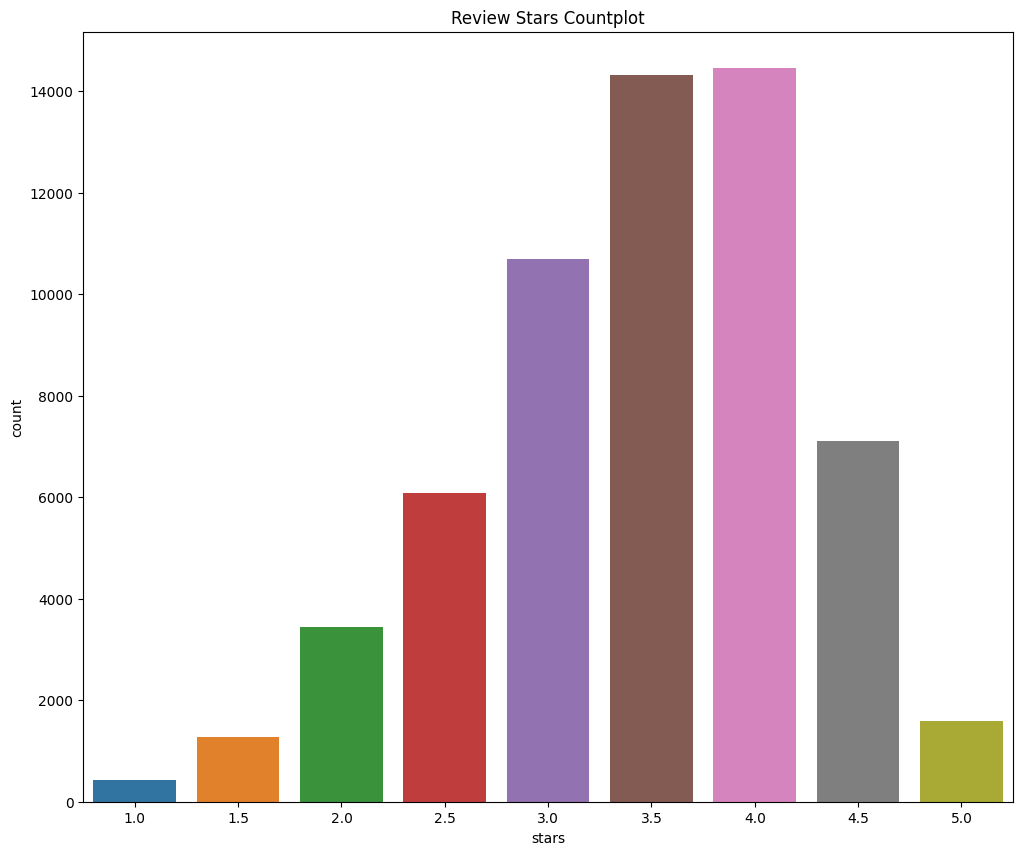

In [9]:
# Countplot of the 'stars' column:

fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(x=df_restaurants['stars'], ax=ax)
plt.title('Review Stars Countplot')
# plt.savefig('stars.png')
plt.show()

In [10]:
top_restaurants = df_restaurants.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True


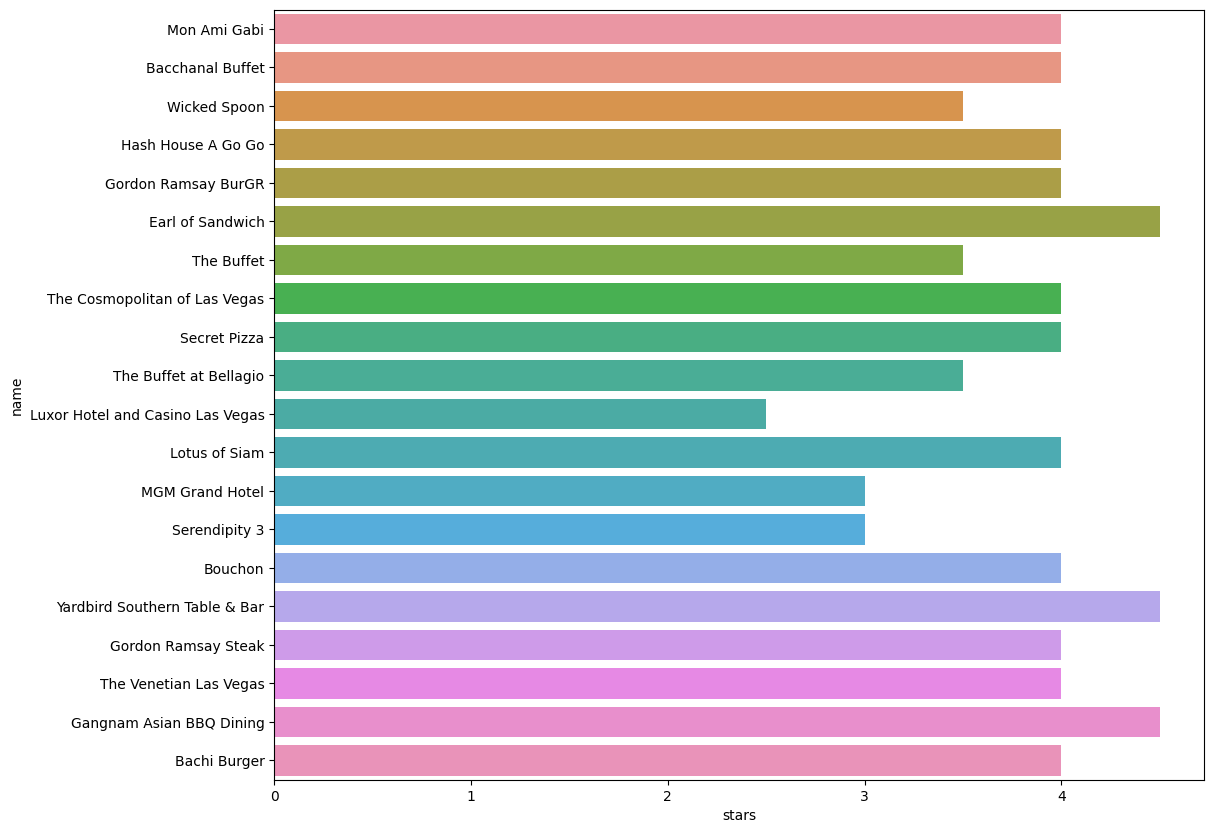

In [11]:
# Visualize the top 20 restaurants on the basis of review_count and stars:

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'stars', y = 'name', data=top_restaurants, ax= ax);
#plt.savefig('top20_restaurants.png')
plt.show()

In [12]:
# Taking only northvegas as state:

lasVegas = df_restaurants[df_restaurants.state == 'NV']

In [13]:
# K-means clustering:

# Elbow method to determine the number of K in Kmeans Clustering
coords = lasVegas[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

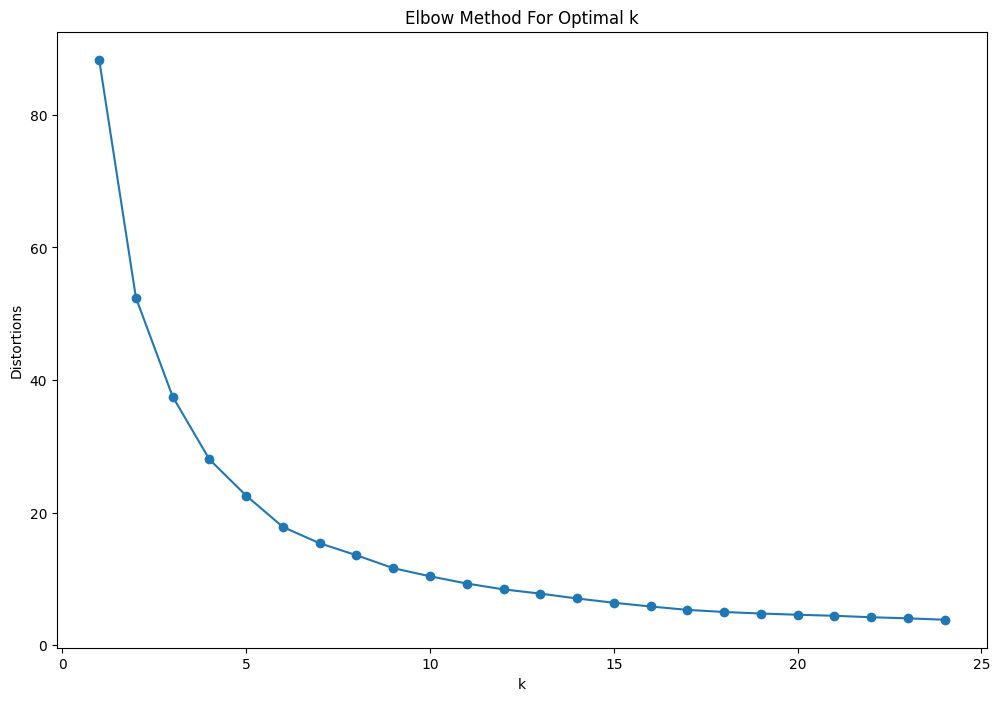

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
# plt.savefig('elbow.png')
plt.show()

In [15]:
# Silhoutte method:

from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [16]:
sil

[0.38432477725432546,
 0.3683788062456911,
 0.39311504670889535,
 0.3890270116312708,
 0.4070867661235934,
 0.41823625819162147,
 0.42548201330497726,
 0.38101717002083774,
 0.40685167043115905,
 0.42578388852131654,
 0.42429425643667706,
 0.4249400140112926,
 0.4329435259567608,
 0.4312649093324731,
 0.4382567219459107,
 0.4341993415598567,
 0.4443922688511201,
 0.4335539410296183,
 0.43899592907947627,
 0.42353126190865437,
 0.44215170517180485,
 0.4371013290502596,
 0.4415864374381934,
 0.42833932670358205,
 0.4264661057608343,
 0.4475614211150963,
 0.4395478610565169,
 0.43738303903728365,
 0.43583566734386714,
 0.4420708502071821,
 0.43163375005642834,
 0.4446197773240835,
 0.4270410610617725,
 0.42750958929153576,
 0.4441439872819749,
 0.43976423731739983,
 0.4317416872282411,
 0.44008518523002693,
 0.43523149175746506,
 0.44476889566370065,
 0.4444314608490748,
 0.4394604488490887,
 0.4334464978463149,
 0.4459913428087445,
 0.445882260515105,
 0.4456757128328905,
 0.454588866310

In [17]:
# Clustering:

kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k = 5  silhouette_score  0.3887195113774468


In [18]:
lasVegas['cluster'] = kmeans.predict(lasVegas[['longitude','latitude']])
lasVegas.head()

<ipython-input-18-379bf67a434b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True,2
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",True,1
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",None,True,3
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,None,"Restaurants, Chinese",None,True,4
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True,2


In [19]:
# Location based recommendation:

top_restaurants_lasVegas = lasVegas.sort_values(by=['review_count', 'stars'], ascending=False)
top_restaurants_lasVegas.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True,2
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True,2
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True,2
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,2
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True,2


In [20]:
def recommend_restaurants(df, longitude, latitude):

    # Predict the cluster for longitude and latitude provided:

    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)

    # Get the best restaurant in this cluster:

    return  df[df['cluster']==cluster].iloc[0:5][['name', 'latitude','longitude'	]]

In [21]:
recommend_restaurants(top_restaurants_lasVegas,-115.1891691,  36.1017316)

2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
82250,Mon Ami Gabi,36.112859,-115.172434
89206,Bacchanal Buffet,36.116113,-115.176222
35199,Wicked Spoon,36.109550,-115.176155
58852,Hash House A Go Go,36.118181,-115.171580
141820,Gordon Ramsay BurGR,36.110724,-115.172169


In [22]:
recommend_restaurants(top_restaurants_lasVegas,-115.2798544, 36.0842838)

3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
131069,Hash House A Go Go,36.144713,-115.240092
130281,Mr Mamas,36.086287,-115.226134
116890,Echo & Rig,36.166576,-115.286232
42288,Red Rock Casino Resort & Spa,36.156413,-115.332847
11169,Juan's Flaming Fajitas & Cantina,36.100509,-115.302689


In [23]:
recommend_restaurants(top_restaurants_lasVegas, 	-115.082821, 36.155011 )

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
79764,Eat.,36.166900,-115.138977
127088,Pizza Rock,36.171618,-115.142267
55675,Carson Kitchen,36.167878,-115.140640
160676,Golden Nugget,36.169781,-115.145534
110619,Le Thai,36.168802,-115.139880


In [24]:
test_coordinates = {
    'user': [1, 2, 3],
    'latitude' : [36.1017316, 36.0842838, 36.155011],
    'longitude' : [-115.1891691, -115.2798544, -115.082821],
}

test_df = pd.DataFrame(test_coordinates)
test_df

,user,latitude,longitude
0,1,36.101732,-115.189169
1,2,36.084284,-115.279854
2,3,36.155011,-115.082821


In [25]:
user1 = test_df[test_df['user'] == 1]
user1

,user,latitude,longitude
0,1,36.101732,-115.189169


In [ ]:
# You can visualize the clusters using mapbox:

In [27]:
#fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_lasVegas, user1.longitude, user1.latitude), lat="latitude", lon="longitude",
                   #zoom=10, width=1200, height=800, hover_data= ['name', 'latitude', 'longitude'])
#fig.add_scattermapbox(lat=user1["latitude"], lon= user1["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))

In [28]:
#user2 = test_df[test_df['user'] == 2].reset_index()
#fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_lasVegas, user2.longitude, user2.latitude), lat="latitude", lon="longitude",
                   #zoom=10, width=1200, height=800, hover_data= ['name', 'latitude', 'longitude'])
#fig.add_scattermapbox(lat=user2["latitude"], lon= user2["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))#

In [29]:
#user3 = test_df[test_df['user'] == 2].reset_index()
#fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_lasVegas, user3.longitude, user3.latitude), lat="latitude", lon="longitude",
                   #zoom=10, width=1200, height=800, hover_data= ['name', 'latitude', 'longitude'])
#fig.add_scattermapbox(lat=user3["latitude"], lon= user3["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))